#**Object Detection -> Fruit detection using YOLOV3**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install cvlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 81.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046382 sha256=2b5549a85a9736c999f423bb684c1326708ed3b258bd0cc2fcee0450053528e6
  Stored in directory: /root/.cache/pip/wheels/96/ad/4c/d80d4bf4143c154ab297e2384915c89aff43d77d1787b9a702
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12080 sha256=dfa6083f7f99a487685bed16c4c43ede2b6fd8be8b77fd8ce01c2d313f204bf8
  Stored in directory: /root/.cache/pip/wheels/d7/d9/89/a3f31c76ff6d51dc3b1575628f59afe59e4ceae3f2748cd7ad
Successfully built cvlib progressbar


In [3]:
from IPython.display import Image, display
import cv2
import cvlib as cv
from cvlib.object_detection import draw_bbox


Displaying image: apple.jpg


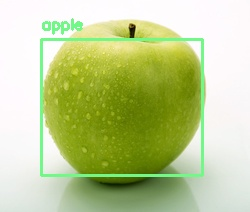


Displaying image: clock.jpg


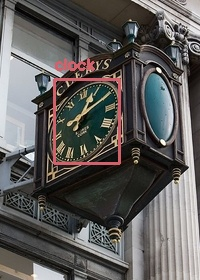


Displaying image: oranges.jpg


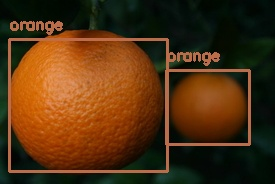


Displaying image: car.jpg


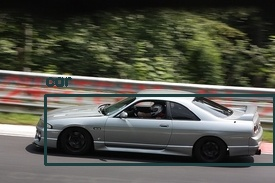

In [4]:
# Some example images
image_files = [
    'apple.jpg',
    'clock.jpg',
    'oranges.jpg',
    'car.jpg'
]

for image_file in image_files:
    print(f"\nDisplaying image: {image_file}")
    display(Image(filename=f"/content/drive/MyDrive/MSR/OnlineCertification/MLforProductions/images/{image_file}"))

In [5]:
def detect_and_draw_box(filename, model="yolov3-tiny", confidence=0.5):
    """Detects common objects on an image and creates a new image with bounding boxes.
    Args:
        filename (str): Filename of the image.
        model (str): Either "yolov3" or "yolov3-tiny". Defaults to "yolov3-tiny".
        confidence (float, optional): Desired confidence level. Defaults to 0.5.
    """
    
    # Images are stored under the images/ directory
    img_filepath = f'/content/drive/MyDrive/MSR/OnlineCertification/MLforProductions/images/{filename}'
    
    # Read the image into a numpy array
    img = cv2.imread(img_filepath)
    
    # Perform the object detection
    bbox, label, conf = cv.detect_common_objects(img, confidence=confidence, model=model)
    
    # Print current image's filename
    print(f"========================\nImage processed: {filename}\n")
    
    # Print detected objects with confidence level
    for l, c in zip(label, conf):
        print(f"Detected object: {l} with confidence level of {c}\n")
    
    # Create a new image that includes the bounding boxes
    output_image = draw_bbox(img, bbox, label, conf)
    
    # Save the image in the directory images_with_boxes
    cv2.imwrite(f'/content/drive/MyDrive/MSR/OnlineCertification/MLforProductions/images/{filename}', output_image)
    
    # Display the image with bounding boxes
    display(Image(f'/content/drive/MyDrive/MSR/OnlineCertification/MLforProductions/images/{filename}'))

#Testing

Image processed: apple.jpg

Detected object: apple with confidence level of 0.6011115908622742



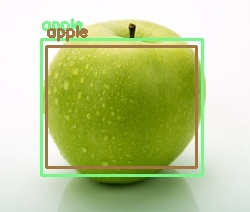

Image processed: clock.jpg

Detected object: clock with confidence level of 0.9298697113990784



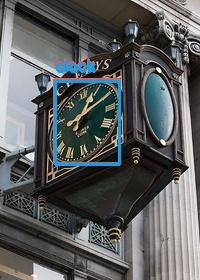

Image processed: oranges.jpg



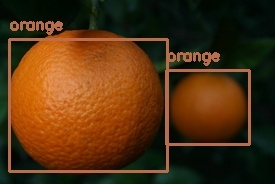

Image processed: car.jpg

Detected object: car with confidence level of 0.5627078413963318



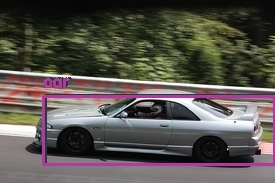

In [6]:
for image_file in image_files:
    detect_and_draw_box(image_file)

Image processed: fruit1.jpg

Detected object: apple with confidence level of 0.8956946730613708

Detected object: orange with confidence level of 0.8200128078460693

Detected object: apple with confidence level of 0.6943750977516174

Detected object: apple with confidence level of 0.6113592386245728



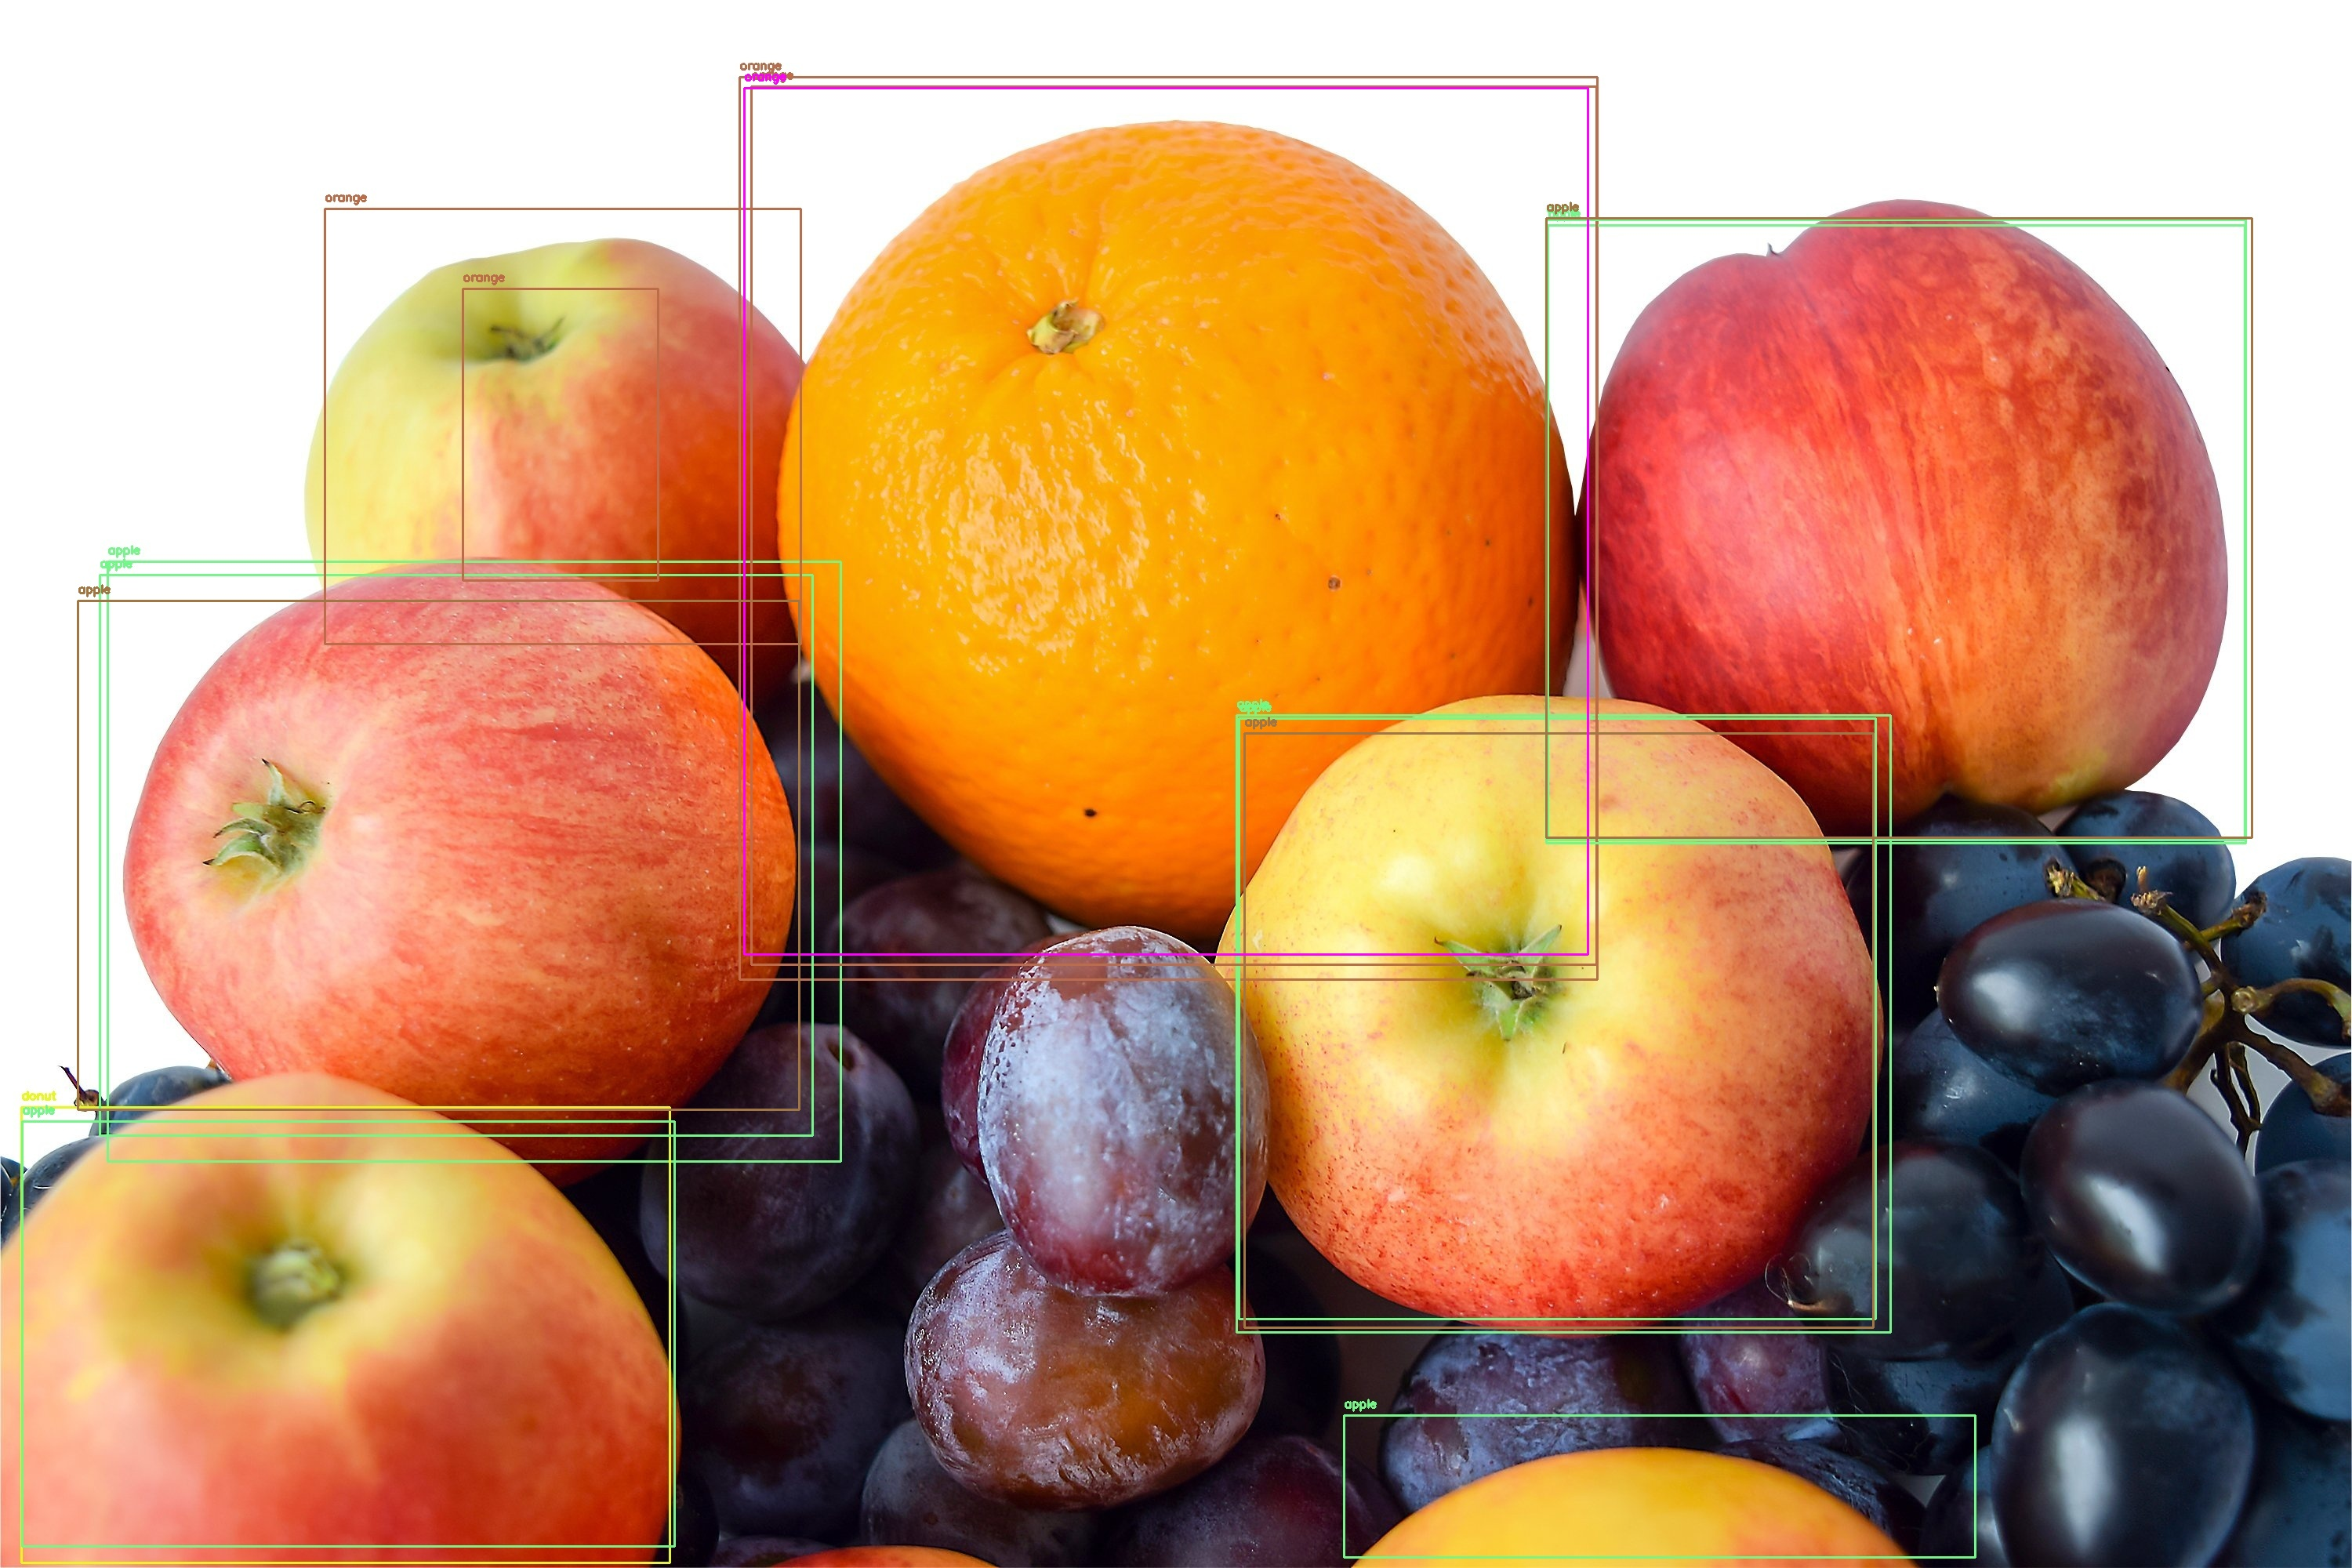

In [7]:
#Changing the confidence level
detect_and_draw_box("fruit1.jpg")

Image processed: fruits.jpg

Detected object: banana with confidence level of 0.6844173073768616

Detected object: banana with confidence level of 0.3471013605594635

Detected object: orange with confidence level of 0.23841525614261627

Detected object: apple with confidence level of 0.2249404340982437

Detected object: orange with confidence level of 0.21062181890010834



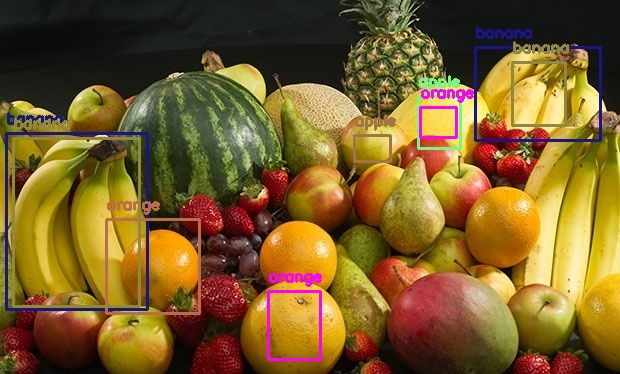

In [8]:
detect_and_draw_box("fruits.jpg", confidence=0.2)

#Deplyment with FastAPI

In [9]:
#Basics
"""
start FastAPI -> app = FastAPI()

"""

'\nstart FastAPI -> app = FastAPI()\n\n'

In [10]:
!pip install uvicorn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 KB 6.9 MB/s eta 0:00:00


In [11]:
!pip install fastapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.9/66.9 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 10.2 MB/s eta 0:00:00


In [12]:
import io
import uvicorn #Asynchronous Server Gateway Interface (ASGI) implementation
import numpy as np
import nest_asyncio
from enum import Enum
from fastapi import FastAPI, UploadFile, File, HTTPException
from fastapi.responses import StreamingResponse

In [20]:
!pip install python-multipart

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 4.1 MB/s eta 0:00:00


In [21]:
app = FastAPI(title ='Deploying a ML model with Fast API')
class Model(str, Enum):
  yolov3tiny = "yolov3-tiny"
  yolov3 = "yolov3"

@app.get("/")
def home():
  return "API started"

@app.post("/predict")
def prediction(model: Model, file: UploadFile = File(...)):
  #Step 1
  filename = file.filename
  fileExtension = filename.split(".")[-1] in ("jpg","jpeg","png")
  if not fileExtension:
    raise HTTPException(status_code = 415, detail = "Unsupported file provided")

  #Step 2
  #transform raw image into cv2 image
  image_stream = io.BytesIO(file.file.read())
  image_stream.seek(0)

  #stream of byte into a numpy array
  file_bytes = np.asarray(bytearray(image_stream.read()), dtype=np.uint8)

  #decode the numpy array as an image
  image = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)

  #Step 3
  bbox, label, conf = cv.detect_common_objects(image, model = model)
  output_image = draw_bbox(image, bbox, label, conf)

  cv2.imwrite(f'/content/drive/MyDrive/MSR/OnlineCertification/MLforProductions/images/{filename}',output_image)

  #step 4
  #open the saved image for reading in binary mode
  file_image = open(f'/content/drive/MyDrive/MSR/OnlineCertification/MLforProductions/images/{filename}', mode = "rb")

  return StreamingResponse(file_image, media_type="image/jpeg")

In [ ]:
#Start server
nest_asyncio.apply()

host = "127.0.0.1"

#start up the server
uvicorn.run(app, host = host, port = 8000, root_path= "/serve")

INFO:     Started server process [131]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
